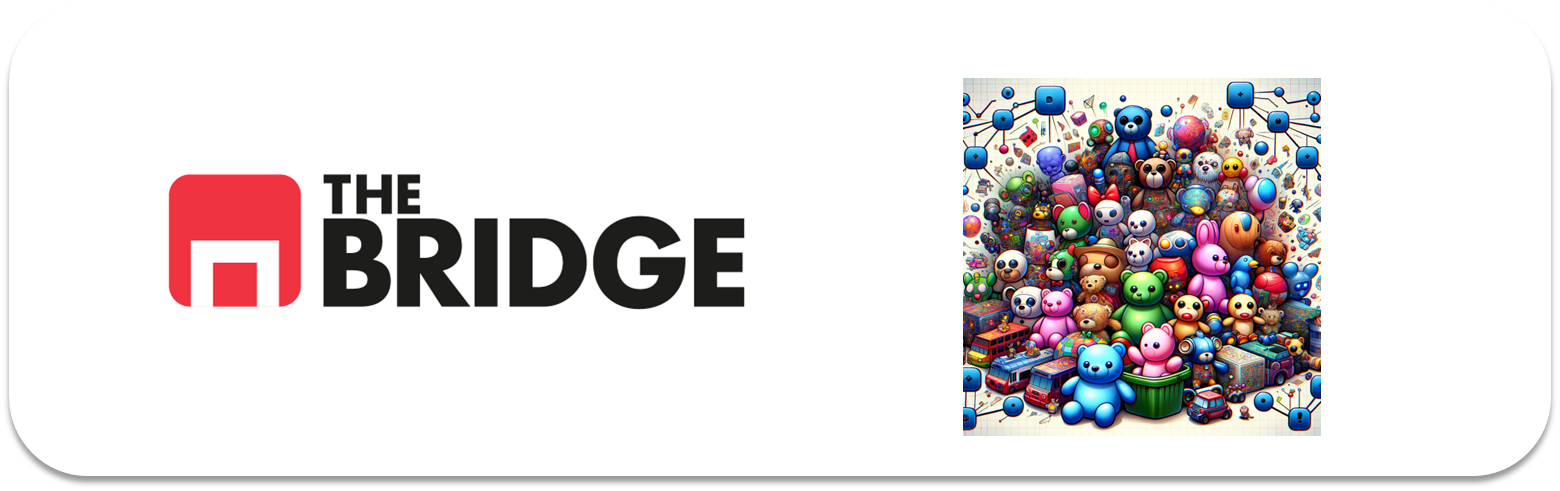

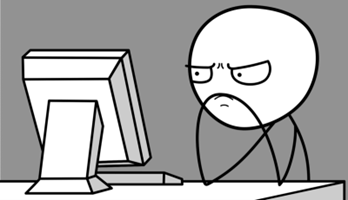

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [20]:
# Common imports
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


import bootcampviztools as bt
from toolbox_ML import *
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


# VISUALIZACIÓN Y MINI EDA

In [5]:
# Cargar los datos
data = pd.read_csv("./data/empowering_drinks.csv", sep="|")

# Visualizar las primeras filas de los datos
print(data.head())

   Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina
0  1.518613               0.232053  1.034819       1.013009  0.251717
1  0.246290              -0.827996  0.733629       0.965242 -0.293321
2  0.196879               1.109334  1.215533       1.395148  0.269020
3  1.691550               0.487926  1.466525       2.334574  1.186068
4  0.295700               1.840403  0.663351      -0.037874 -0.319276


In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB
None


In [7]:
print(data.describe())


         Azúcares  Vitamínas del grupo B     Cafeína  Ácido Cítrico  \
count  153.000000             153.000000  153.000000     153.000000   
mean     0.019231               0.037273    0.041057       0.080022   
std      1.026182               0.995984    1.040928       1.009450   
min     -2.434235              -3.679162   -1.695971      -1.493188   
25%     -0.816038              -0.499016   -1.043392      -0.738463   
50%      0.061000              -0.023821    0.211566      -0.165254   
75%      0.876275               0.707247    0.894264       0.917474   
max      2.259772               3.156325    3.062832       2.971473   

          Taurina  
count  153.000000  
mean    -0.044088  
std      0.934399  
min     -1.634288  
25%     -0.799428  
50%     -0.154899  
75%      0.493956  
max      2.431870  


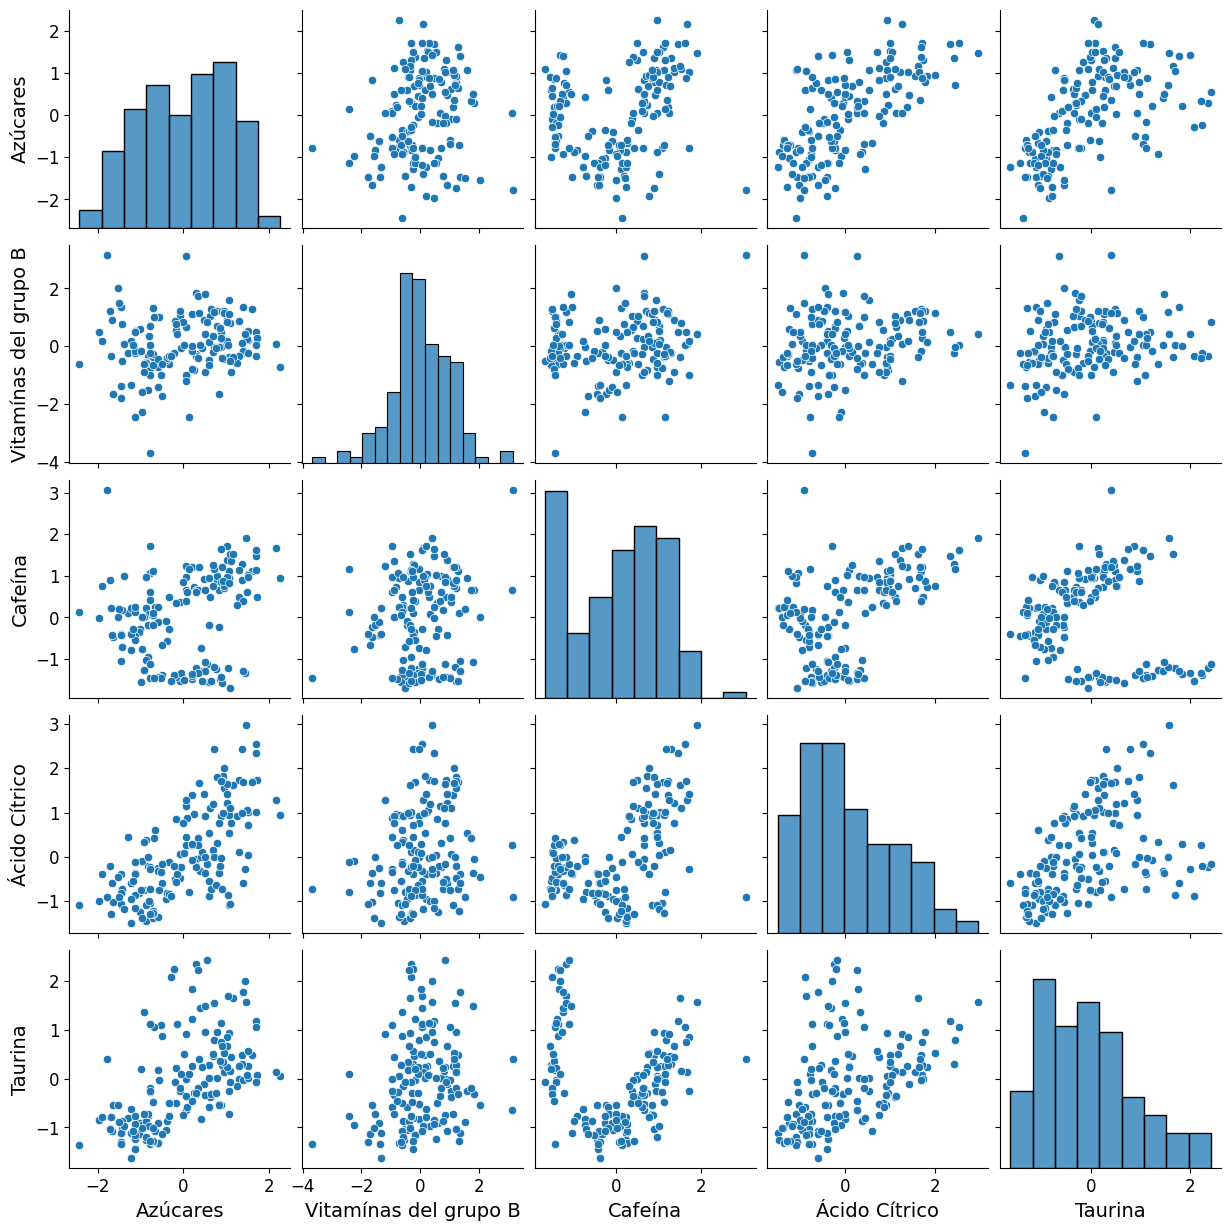

In [8]:
# Visualizar la distribución de las características
sns.pairplot(data)
plt.show()

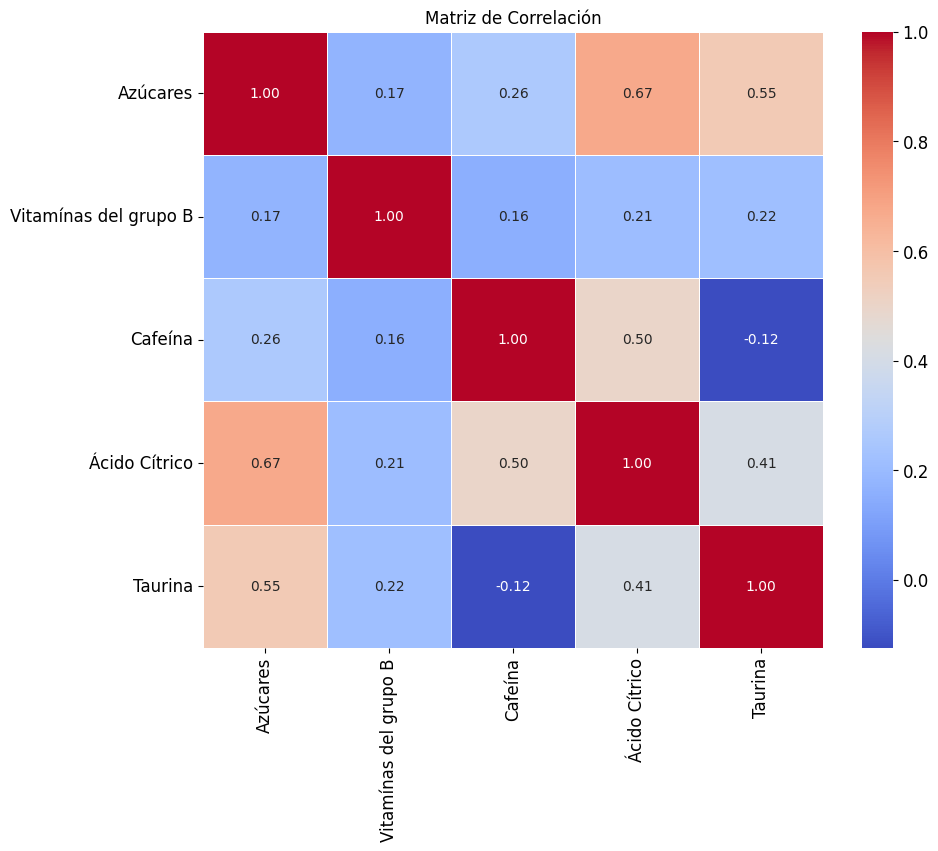

In [9]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()


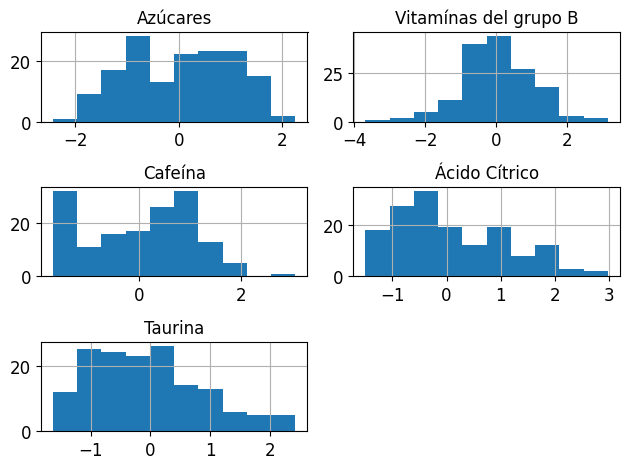

In [12]:
data.hist()
plt.tight_layout()

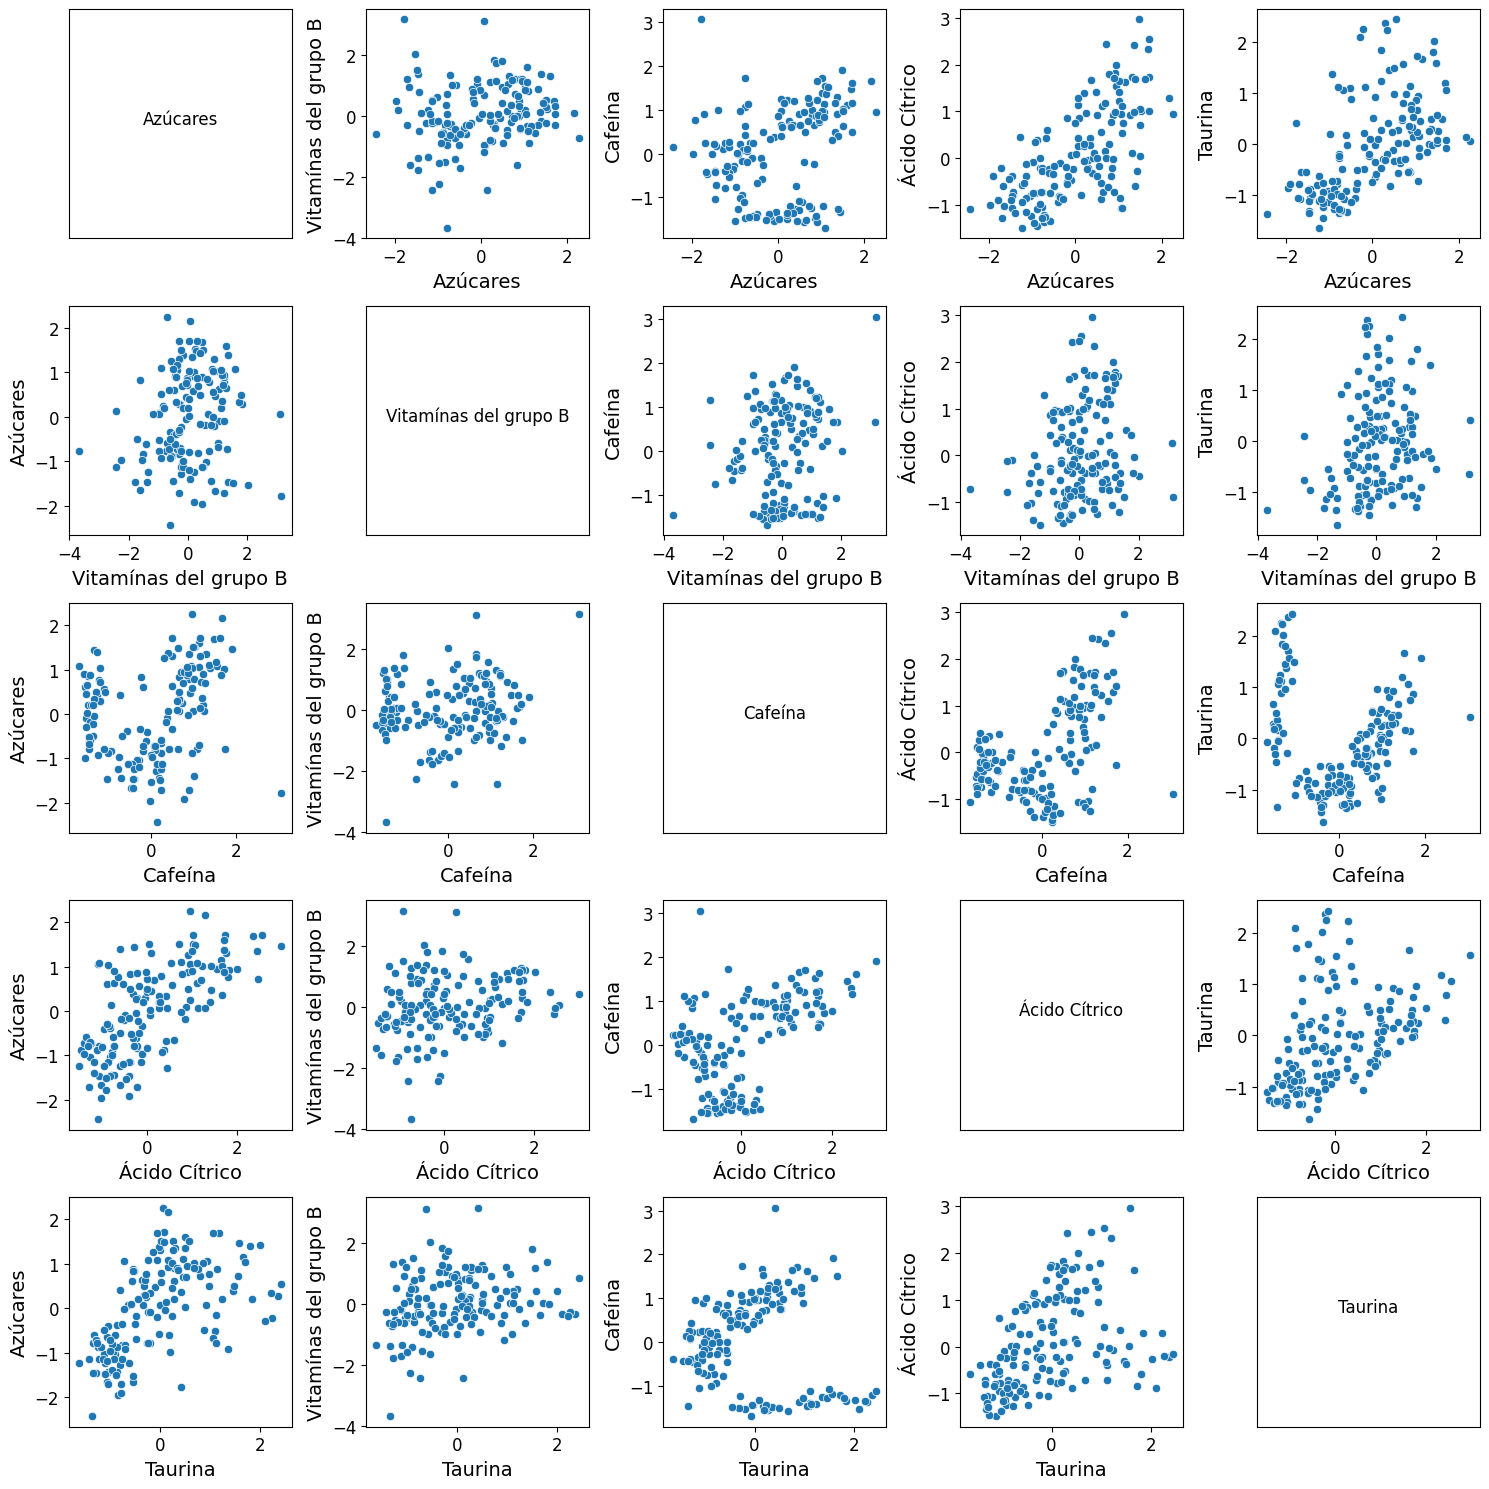

In [25]:
# Crear visualizaciones de dispersión para cada par de características
num_features = data.shape[1]

plt.figure(figsize=(15, 15))
for i in range(num_features):
    for j in range(num_features):
        plt.subplot(num_features, num_features, i * num_features + j + 1)
        if i != j:
            sns.scatterplot(x=data.iloc[:, i], y=data.iloc[:, j])
            plt.xlabel(data.columns[i])
            plt.ylabel(data.columns[j])
        else:
            plt.text(0.5, 0.5, data.columns[i], fontsize=12, ha='center')
            plt.xticks([])
            plt.yticks([])

plt.tight_layout()
plt.show()


# DBSCAN

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


Text(0, 0.5, '$X_2$')

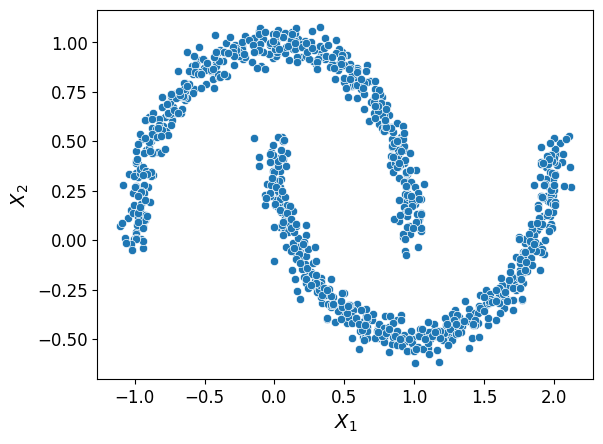

In [14]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

sns.scatterplot(x = X[:,0], y = X[:,1])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")


In [15]:

from sklearn.cluster import DBSCAN

'''
Empieza con un punto aleatorio y segun va montando un cluster, busca en los puntos vecinos
eps: (epsilon) distancia sobre la que busca vecinos
min_samples: minimo numero de vecinos para considerarse cluster
'''
dbscan = DBSCAN(eps=0.05,
                min_samples=5)
dbscan.fit(X)

# El algoritmo
print(dbscan)

# Todos los datos etiquetados
print(len(dbscan.labels_))

# Los 10 primeros labels
print(dbscan.labels_[:10])

# Cuantos clusters ha montado
print(np.unique(dbscan.labels_))


DBSCAN(eps=0.05)
1000
[ 0  2 -1 -1  1  0  0  0  2  5]
[-1  0  1  2  3  4  5  6]


In [16]:
# Cuantos core_sample_indices_
print(len(dbscan.core_sample_indices_))

# Los indices de los 10 primeros core_sample
print(dbscan.core_sample_indices_[:10])

# La posicion (coordenadas) de los 5 primeros core_sample
print(dbscan.components_[:5])


# Aumentemos epsilon para que tenga mayor rango y se formen menos clusters
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

808
[ 0  4  5  6  7  8 10 11 12 13]
[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]]


DBSCAN(eps=0.2)

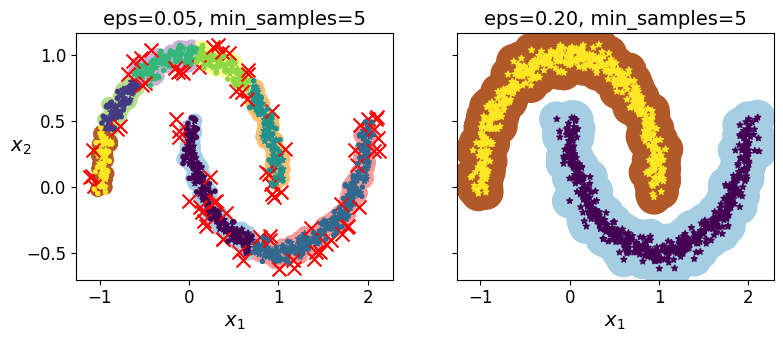

In [17]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)



plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)


plt.show()


# PREDICCIÓN DBSCAN

In [21]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_]) # Fijate que se entrena con las instancias core, no con todas las instancias (aunque podríamos hacerlo con todas)

KNeighborsClassifier(n_neighbors=50)

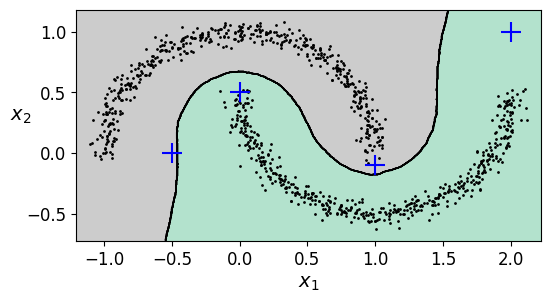

In [22]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)


knn.predict_proba(X_new)

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()



In [ ]:

y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1) # método que 
                                                        #devuelve la distancia y el índice de los vecinos 
                                                        #indicados por n_neighbors (devuelve los vecinos ordenados 
                                                        #por distancia), es decir con n_neighbors = 1 recupero 
                                                        # el vecino más cercano
y_pred = dbscan2.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1 # Básicamente lo que dice es que si la distancia al vecino más cercano es 0.2 (el epsilon del modelo DBSCAN), en 
                        # este caso, quiere decir que es una anomalíaç
                        # Si, no se queda con la clase de ese vecino
print(y_pred)   
y_pred.ravel()

# CLUSTERING JERARQUICO

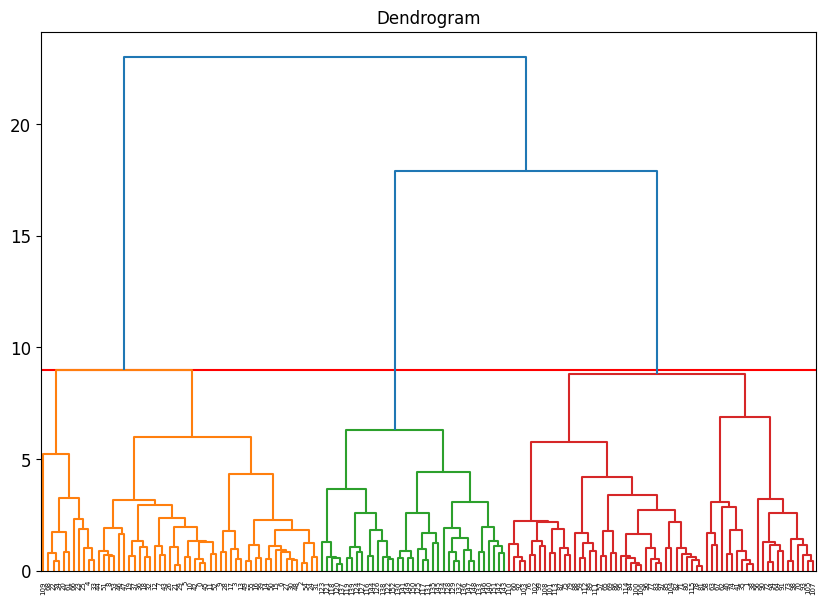

In [30]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
plt.axhline(y = 9, color = 'r', linestyle = '-')

clusters = shc.linkage(data, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()


In [32]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(data)
clustering_model.labels_

array([1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 4, 4, 3, 0, 0, 0, 4,
       3, 0, 3, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 3,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

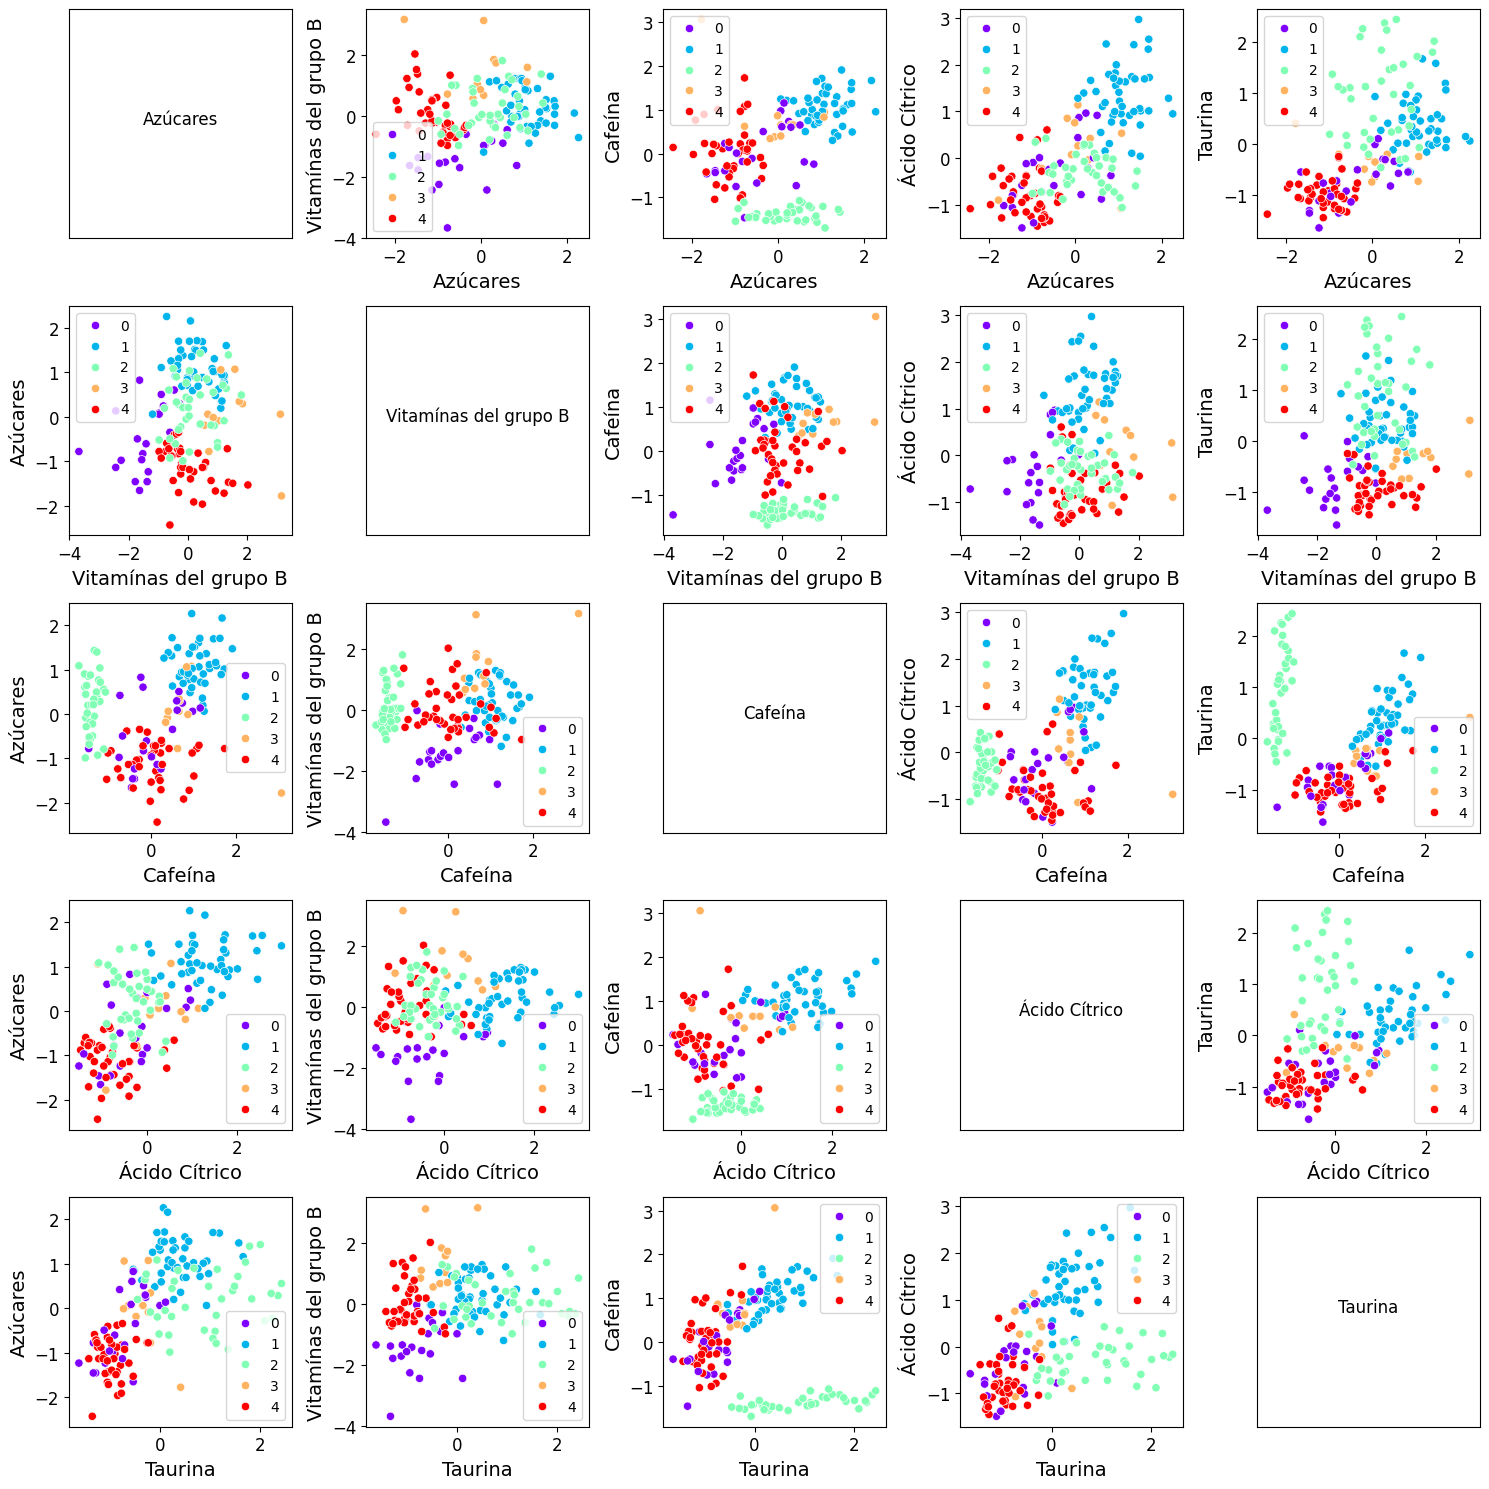

In [36]:
import seaborn as sns

# Obtener las etiquetas de clustering del modelo
data_labels = clustering_model.labels_

# Crear visualizaciones de dispersión para cada par de características con etiquetas de clustering
num_features = data.shape[1]

plt.figure(figsize=(15, 15))
for i in range(num_features):
    for j in range(num_features):
        plt.subplot(num_features, num_features, i * num_features + j + 1)
        if i != j:
            sns.scatterplot(x=data.iloc[:, i], y=data.iloc[:, j], hue=data_labels, palette="rainbow")
            plt.xlabel(data.columns[i])
            plt.ylabel(data.columns[j])
        else:
            plt.text(0.5, 0.5, data.columns[i], fontsize=12, ha='center')
            plt.xticks([])
            plt.yticks([])

plt.tight_layout()
plt.show()


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [48]:
data_2 = pd.read_csv("./data/new_experiments.csv", sep = "|")

In [49]:
data_2

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [50]:
from sklearn.neighbors import NearestNeighbors

# Calcular la distancia media a los k-vecinos más cercanos
k = 5  # Puedes ajustar este valor según sea necesario
nbrs = NearestNeighbors(n_neighbors=k).fit(data_2)
distances, _ = nbrs.kneighbors(data_2)
avg_distance = np.mean(distances[:, 1:])  # Excluimos la distancia al punto en sí mismo

# Utilizar la distancia media como valor de eps
eps = avg_distance


In [51]:
# Aplicar el modelo al nuevo conjunto de datos
new_data_labels = clustering_model.fit_predict(data_2)

# Visualizar los resultados si es necesario
print("Etiquetas de los nuevos experimentos:")
print(new_data_labels)

Etiquetas de los nuevos experimentos:
[4 3 0 1 0 2]


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

In [41]:
df_results = pd.read_csv("./data/power_results.csv", sep = "|")


In [42]:
df_results

,class
0,1
1,1
2,1
3,1
4,1
...,...
154,1
155,2
156,2
157,3


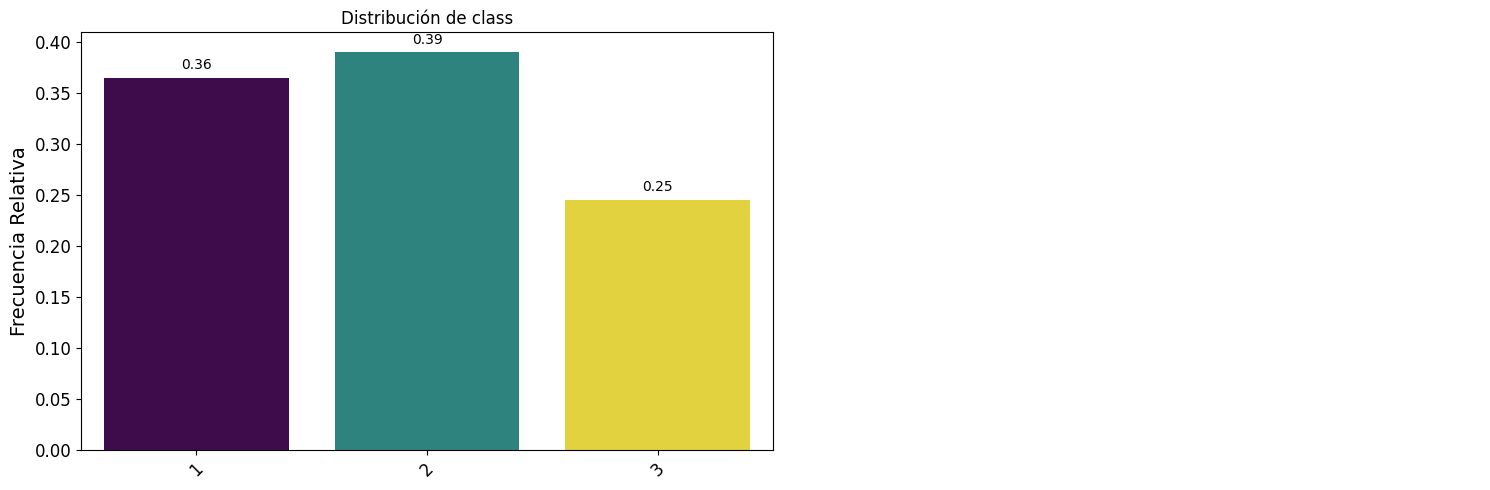

In [43]:
bt.pinta_distribucion_categoricas(df_results,["class"], mostrar_valores = True, relativa = True)